In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt

In [10]:
df1 = pd.read_csv('AirPassengers.csv')

In [5]:
df1.dtypes


Month          object
#Passengers     int64
dtype: object

In [6]:
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
df1.columns = ['Months','Passenger']

In [16]:
df1.head()

,Months,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
df1['Months'] = pd.to_datetime(df1['Months'])


In [19]:
df1.dtypes


Months       datetime64[ns]
Passenger             int64
dtype: object

In [21]:
df1 = df1.set_index(['Months'])

In [22]:
df1.head()

,Passenger
Months,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
df1['1951-04-01':'1952-03-01']

,Passenger
Months,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [24]:
df1.loc['1960-05-01']

Passenger    472
Name: 1960-05-01 00:00:00, dtype: int64

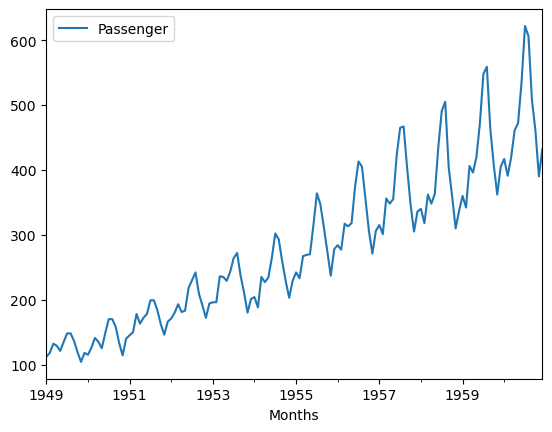

In [25]:
df1.plot()
plt.show()

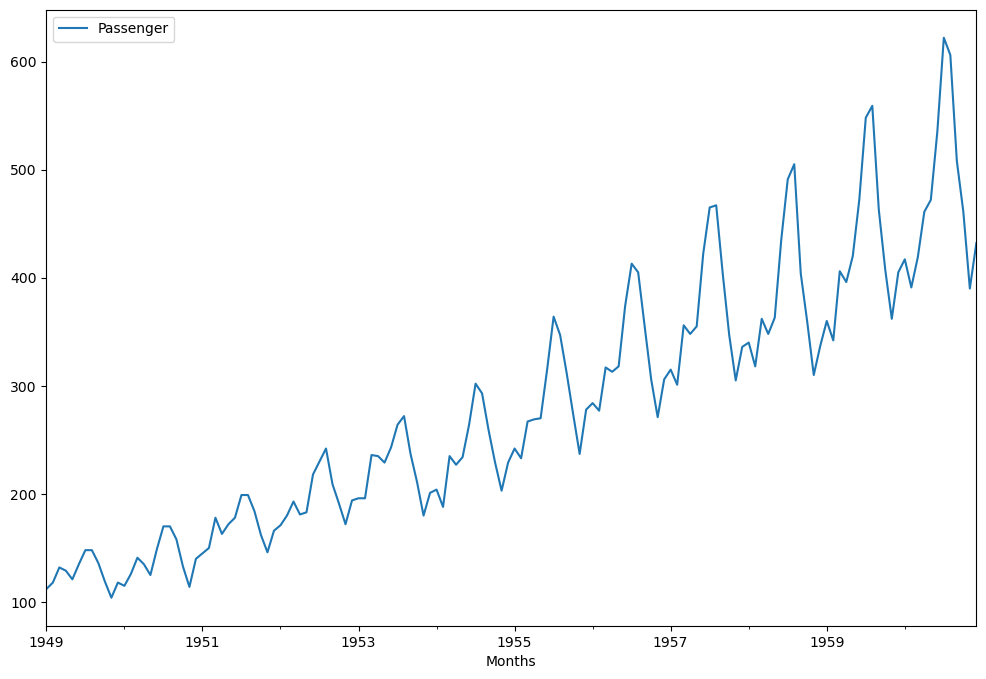

In [27]:
#increase the figure size
from pylab import rcParams
rcParams['figure.figsize']=12,8
df1.plot()
plt.show()

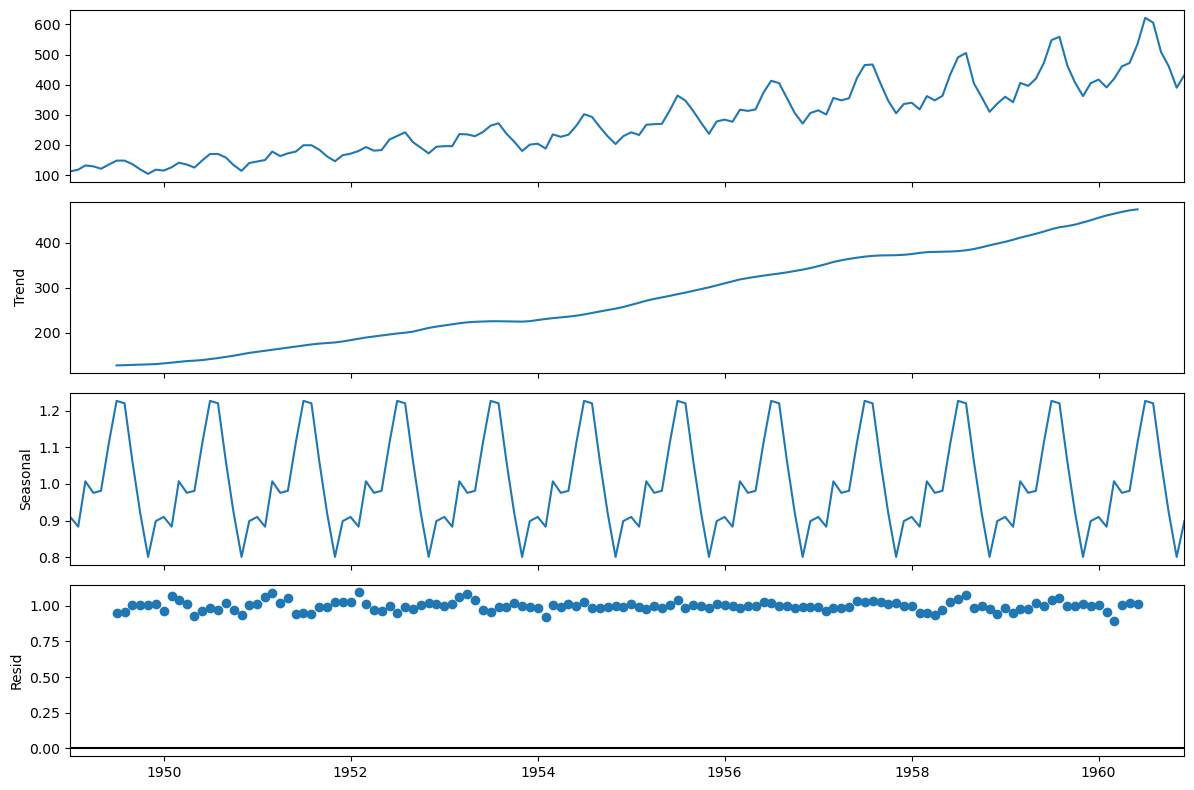

In [29]:
#decompose the time series Multiplicatively
df1_mul_decompose = seasonal_decompose(df1,model="multiplicative")
df1_mul_decompose.plot()
plt.show()

In [30]:
df1_log = df1.copy()

In [31]:
df1_log['Passenger']=np.log(df1)

In [35]:
df1_log['Passenger']


Months
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passenger, Length: 144, dtype: float64

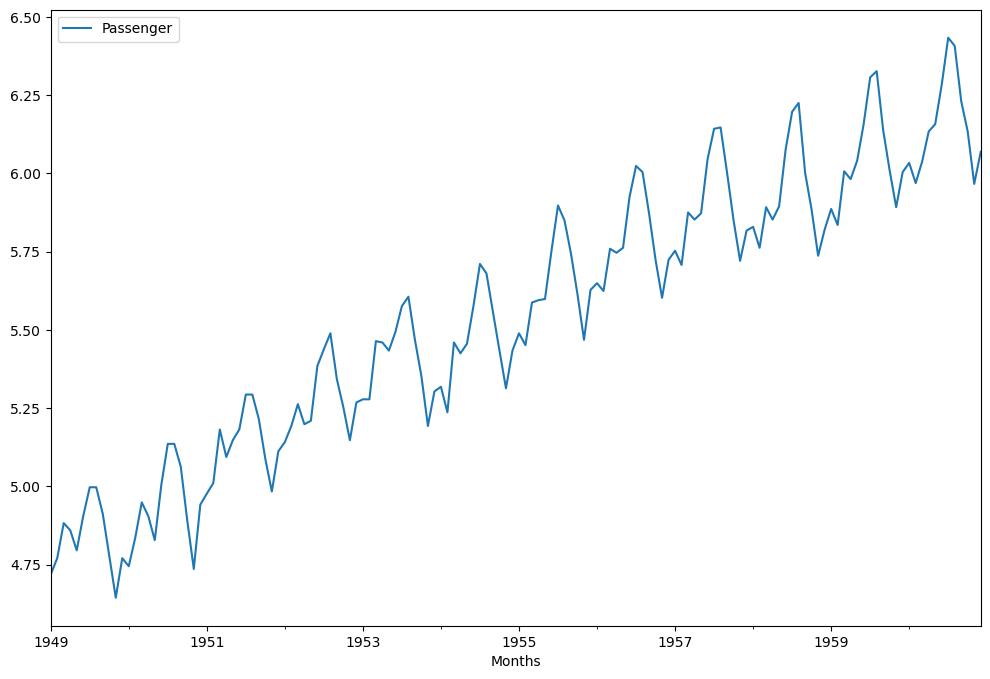

In [36]:
df1_log.plot()
plt.show()

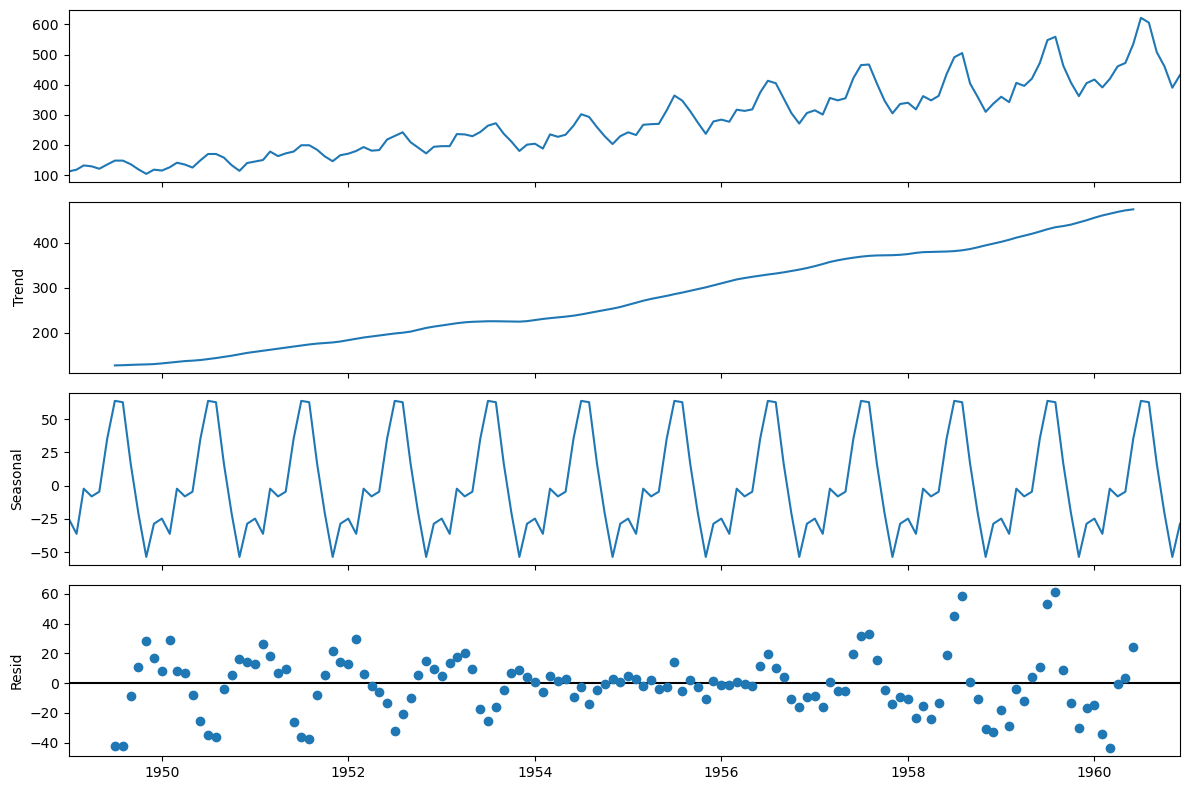

In [37]:
#decompose the time series additive
df1_add_decompose = seasonal_decompose(df1,model="additive")
df1_add_decompose.plot()
plt.show()

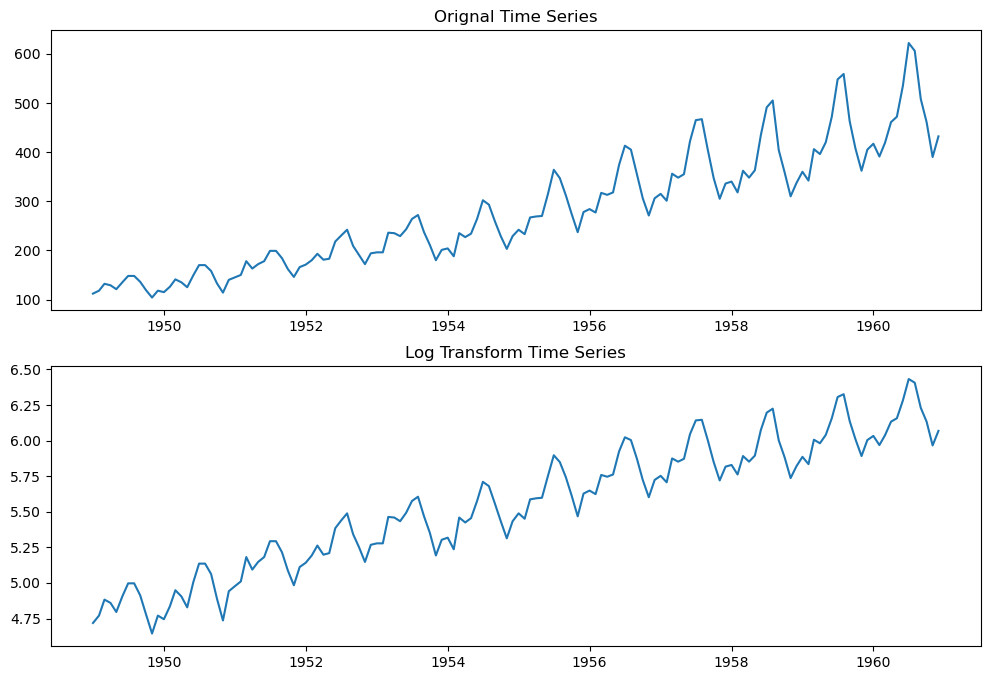

In [38]:
plt.subplot(2,1,1)
plt.title("Orignal Time Series")
plt.plot(df1)

plt.subplot(2,1,2)
plt.title("Log Transform Time Series")
plt.plot(df1_log)
plt.show()